In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
cat_thetao = col.search(variable_id= 'thetao', experiment_id= 'piControl')
cat_thetao.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-CM6-1', 'GISS-E2-1-G',
       'BCC-CSM2-MR', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'AWI-CM-1-1-MR',
       'BCC-ESM1', 'EC-Earth3-LR', 'CanESM5', 'MIROC6', 'CESM2',
       'CESM2-WACCM', 'GISS-E2-1-H', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'EC-Earth3-Veg', 'MPI-ESM-1-2-HAM', 'HadGEM3-GC31-LL',
       'NESM3', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'EC-Earth3',
       'CAMS-CSM1-0', 'MCM-UA-1-0', 'GISS-E2-1-G-CC', 'MIROC-ES2L',
       'UKESM1-0-LL', 'SAM0-UNICON', 'NorCPM1', 'FIO-ESM-2-0',
       'CNRM-CM6-1-HR', 'FGOALS-f3-L', 'E3SM-1-1', 'ACCESS-CM2',
       'GISS-E2-2-G', 'IITM-ESM', 'CESM2-WACCM-FV2', 'CESM2-FV2',
       'FGOALS-g3', 'ACCESS-ESM1-5', 'MRI-ESM2-0', 'HadGEM3-GC31-MM',
       'E3SM-1-1-ECA', 'E3SM-1-0', 'AWI-ESM-1-1-LR', 'CIESM',
       'CAS-ESM2-0', 'NorESM2-LM'], dtype=object)

In [4]:
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
thetao_dict = cat_thetao.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found


In [5]:
thetao_dict

{'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r2i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/thetao/gn/v20190815/.nan.20190815': <xarray.Dataset>
 Dimensions:      (bnds: 2, lev: 40, time: 1200, vertex: 4, x: 256, y: 220)
 Coordinates:
   * x            (x) float64 1.207 2.424 3.642 4.862 ... 356.3 357.6 358.8 360.0
   * y            (y) float64 -77.24 -76.96 -76.67 -76.37 ... 71.7 71.72 71.73
     lat          (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
   * lev          (lev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
     lev_bounds   (lev, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
     lon          (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
   * time         (time) object 1900-01-16 12:00:00 ... 1999-12-16 12:00:00
     time_bounds  (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
     lat_bounds   (y, x, vertex) float64 dask.array<chunksize=(220, 256, 

In [6]:
a = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r2i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/thetao/gn/v20190815/.nan.20190815'

b = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/thetao/gn/v20190710/.nan.20190710'

c = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i1p1f1.Odec.thetao.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Odec/thetao/gn/v20200326/.nan.20200326'

e = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Omon/thetao/gn/v20191214/.nan.20191214'

f = 'CMIP.MPI-M.MPI-ESM1-2-HR.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/thetao/gn/v20190710/.nan.20190710'

g = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Omon/thetao/gr/v20210118/.nan.20210118'

h = 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/thetao/gn/v20190627/.nan.20190627'

k = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/thetao/gn/v20190306/.nan.20190306'

l = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/thetao/gn/v20190429/.nan.20190429' 

m = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/thetao/gn/v20190823/.nan.20190823'

n = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Omon/thetao/gn/v20190429/.nan.20190429'

o = 'CMIP.NCC.NorCPM1.piControl.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NCC/NorCPM1/piControl/r1i1p1f1/Omon/thetao/gr/v20190914/.nan.20190914' 

p = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/thetao/gn/v20181123/.nan.20181123'

q = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Omon/thetao/gn/v20190319/.nan.20190319'

r = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Omon/thetao/gn/v20180701/.nan.20180701' 

s = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Omon/thetao/gr/v20180701/.nan.20180701'

u = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Omon/thetao/gn/v20210118/.nan.20210118'


In [7]:
thetaoa = thetao_dict[a].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaob = thetao_dict[b].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaoc = thetao_dict[c].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaoe = thetao_dict[e].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaof = thetao_dict[f].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaog = thetao_dict[g].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaoh = thetao_dict[h].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaok = thetao_dict[k].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaol = thetao_dict[l].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaom = thetao_dict[m].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaon = thetao_dict[n].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaoo = thetao_dict[o].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaop = thetao_dict[p].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaoq = thetao_dict[q].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaor = thetao_dict[r].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaos = thetao_dict[s].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
thetaou = thetao_dict[u].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)

Text(0.5, 1.0, 'GFDL-ESM4')

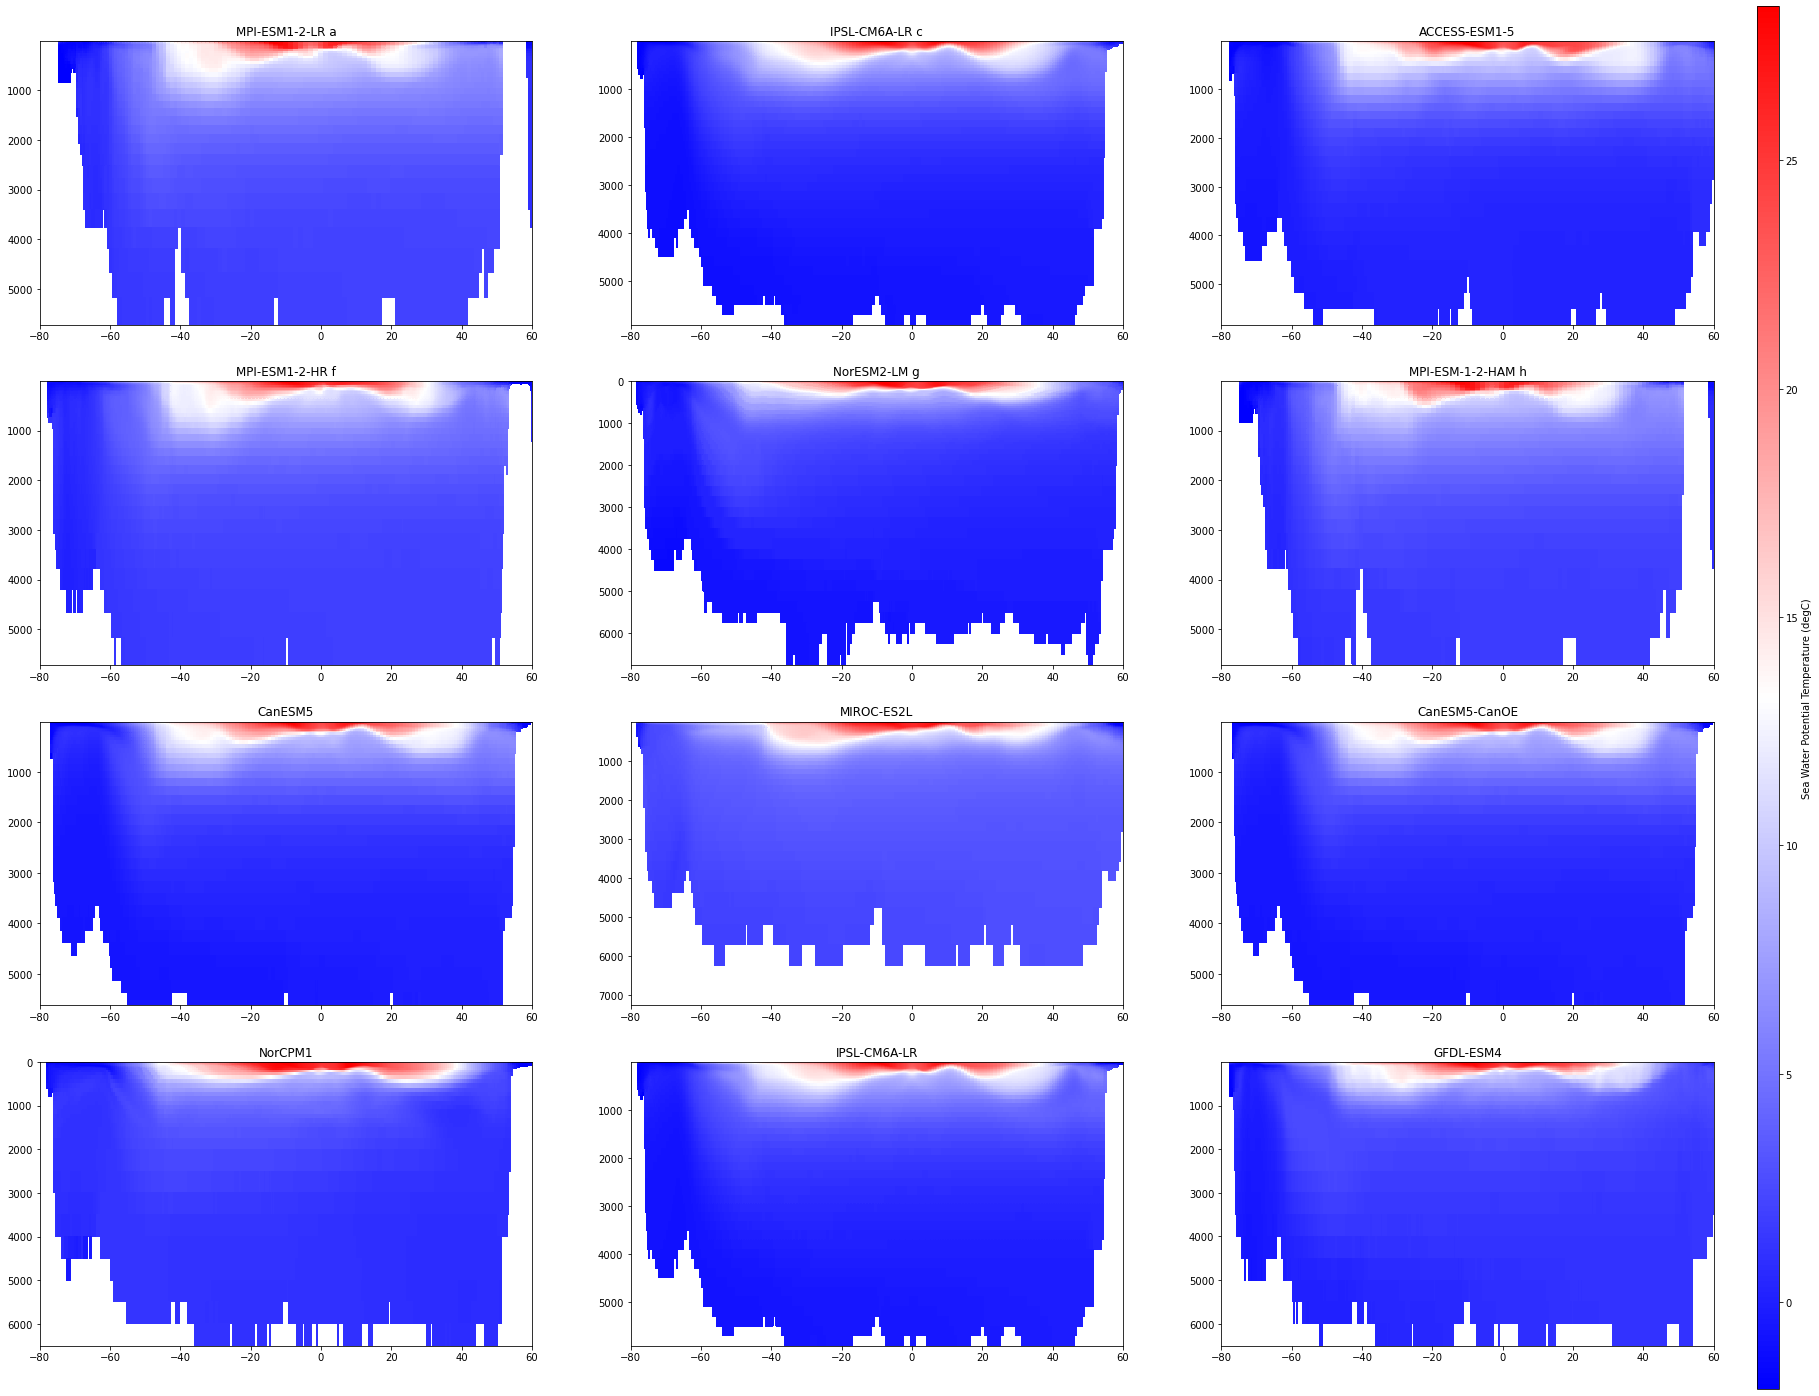

In [15]:
# ax = ((axa, axb, axc), (axf, axg, axh), (axg, axk, axl), (axm, axn, axo), (axp, axq, axr), (axs, axu, axv))
figa, ((axa, axc, axE), (axf, axg, axh), (axl, axm, axn), (axo, axp, axr)) = plt.subplots(nrows = 4,ncols = 3, figsize=[30, 24])
ima = axa.pcolormesh(thetaoa['y'],thetaoa['lev'],thetaoa.thetao, cmap = 'bwr')
axa.set_xlim([-80,60])
axa.invert_yaxis()
cbaxes = figa.add_axes([0.92, 0.1, 0.01, 0.8]) 
cbara = figa.colorbar(ima, cax = cbaxes)
cbara.set_label(thetaoa.thetao.attrs['long_name']+' ('+thetaoa.thetao.attrs['units']+')')
axa.set_title(thetaoa.attrs['source_id']+' a')

# imb = axb.pcolormesh(thetaob['y'],thetaob['lev'],thetaob.thetao, cmap = 'bwr')
# axb.set_xlim([-80,60])
# axb.invert_yaxis()
# axb.set_title(thetaob.attrs['source_id']+' b')

imc = axc.pcolormesh(thetaoc['y'],thetaoc['lev'],thetaoc.thetao, cmap = 'bwr')
axc.set_xlim([-80,60])
axc.invert_yaxis()
axc.set_title(thetaoc.attrs['source_id']+' c')

ime = axE.pcolormesh(thetaoe['y'],thetaoe['lev'],thetaoe.thetao, cmap = 'bwr')
axE.set_xlim([-80,60])
axE.invert_yaxis()
# cbare = plt.colorbar(ima)
# cbare.set_label(DICe.dissic.attrs['long_name']+'\n('+DICe.dissic.attrs['units']+')')
axE.set_title(thetaoe.attrs['source_id'])

imf = axf.pcolormesh(thetaof['y'],thetaof['lev'],thetaof.thetao, cmap = 'bwr')
axf.set_xlim([-80,60])
axf.invert_yaxis()
axf.set_title(thetaof.attrs['source_id']+ ' f')

img = axg.pcolormesh(thetaog['y'],thetaog['lev'],thetaog.thetao, cmap = 'bwr')
axg.set_xlim([-80,60])
axg.invert_yaxis()
axg.set_title(thetaog.attrs['source_id']+' g')

imh = axh.pcolormesh(thetaoh['y'],thetaoh['lev'],thetaoh.thetao, cmap = 'bwr')
axh.set_xlim([-80,60])
axh.invert_yaxis()
axh.set_title(thetaoh.attrs['source_id']+' h')

# imk = axk.pcolormesh(thetaok['y'],thetaok['lev'],thetaok.thetao, cmap = 'bwr')
# axk.set_xlim([-80,60])
# axk.invert_yaxis()
# axk.set_title(thetaok.attrs['source_id'])

iml = axl.pcolormesh(thetaol['y'],thetaol['lev'],thetaol.thetao, cmap = 'bwr')
axl.set_xlim([-80,60])
axl.invert_yaxis()
axl.set_title(thetaol.attrs['source_id'])

imm = axm.pcolormesh(thetaom['y'],thetaom['lev'],thetaom.thetao, cmap = 'bwr')
axm.set_xlim([-80,60])
axm.invert_yaxis()
axm.set_title(thetaom.attrs['source_id'])

imn = axn.pcolormesh(thetaon['y'],thetaon['lev'],thetaon.thetao, cmap = 'bwr')
axn.set_xlim([-80,60])
axn.invert_yaxis()
axn.set_title(thetaon.attrs['source_id'])

imo = axo.pcolormesh(thetaoo['y'],thetaoo['lev'],thetaoo.thetao, cmap = 'bwr')
axo.set_xlim([-80,60])
axo.invert_yaxis()
axo.set_title(thetaoo.attrs['source_id'])

imp = axp.pcolormesh(thetaop['y'],thetaop['lev'],thetaop.thetao, cmap = 'bwr')
axp.set_xlim([-80,60])
axp.invert_yaxis()
axp.set_title(thetaop.attrs['source_id'])

# imq = axq.pcolormesh(thetaoq['y'],thetaoq['lev'],thetaoq.thetao, cmap = 'bwr')
# axq.set_xlim([-80,60])
# axq.invert_yaxis()
# axq.set_title(thetaoq.attrs['source_id'])

imr = axr.pcolormesh(thetaor['y'],thetaor['lev'],thetaor.thetao, cmap = 'bwr')
axr.set_xlim([-80,60])
axr.invert_yaxis()
axr.set_title(thetaor.attrs['source_id'])

# ims = axs.pcolormesh(thetaos['y'],thetaos['lev'],thetaos.thetao, cmap = 'bwr')
# axs.set_xlim([-80,60])
# axs.invert_yaxis()
# axs.set_title(thetaos.attrs['source_id'])

# imu = axu.pcolormesh(thetaou['y'],thetaou['lev'],thetaou.thetao, cmap = 'bwr')
# axu.set_xlim([-80,60])
# axu.invert_yaxis()
# axu.set_title(thetaou.attrs['source_id'])